In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from ssnhl.util import load_data

In [2]:
raw_data = load_data('../raw_data/all.xlsx', preprocess_func=None)
raw_data = raw_data.rename(columns={'prognostic(no_recovery=0, minor_recovery=1, important_recovery=2, full_recovery=3)': 'prognostic'})
raw_data.loc[raw_data['prognostic'] == 0, 'prognostic'] = 'no recovery'
raw_data.loc[raw_data['prognostic'] == 1, 'prognostic'] = 'minor recovery'
raw_data.loc[raw_data['prognostic'] == 2, 'prognostic'] = 'important recovery'
raw_data.loc[raw_data['prognostic'] == 3, 'prognostic'] = 'full recovery'
raw_data

,Gender,Age,Left ear/Right ear,Days from onset to treatment(absolute),days from onset to treatment (categorized),Vertigo,Ear blockage,Tinnitus,Hypertension,Diabetes,...,Mean hearing threshold (affected side),WHO classify (affected side),Curve type (affected side),Mean hearing threshold (contralateral),WHO classify (contralateral),Curve type (contralateral),loudness recruitment(affected side),ABR,DPOAE response,prognostic
patient NO.,,,,,,,,,,,,,,,,,,,,,
4,0,28,R,1,0,0,1,1,0,0,...,49.0,2,upsloping,-1.0,0.0,normal,1.0,0.0,1.0,full recovery
455,0,33,L,15,2,0,1,1,0,0,...,18.0,0,upsloping,0.0,0.0,normal,1.0,0.0,1.0,no recovery
405,0,30,L,10,1,1,0,1,0,0,...,105.0,4,profound,1.0,0.0,normal,0.0,1.0,0.0,no recovery
264,0,27,R,6,0,1,1,1,0,0,...,21.0,0,upsloping,3.0,0.0,normal,1.0,0.0,1.0,full recovery
458,0,29,R,15,2,0,1,1,0,0,...,23.0,0,upsloping,3.0,0.0,normal,0.0,NaN,1.0,full recovery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,0,75,L,5,0,0,1,0,0,0,...,200.0,4,profound,200.0,4.0,profound,0.0,1.0,0.0,no recovery
476,0,42,L,20,2,0,1,1,0,0,...,18.0,0,upsloping,NaN,NaN,normal,1.0,0.0,1.0,full recovery
489,1,54,L,20,2,0,1,1,0,0,...,74.0,3,flat,NaN,NaN,NaN,0.0,NaN,NaN,no recovery


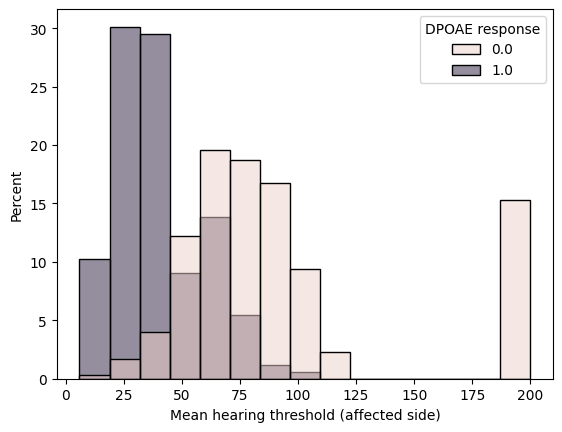

In [3]:
sns.histplot(raw_data, x='Mean hearing threshold (affected side)', stat='percent', hue='DPOAE response', bins=15, common_norm=False)
plt.savefig('../output/DPOAE_influence.pdf', bbox_inches="tight")
plt.show()

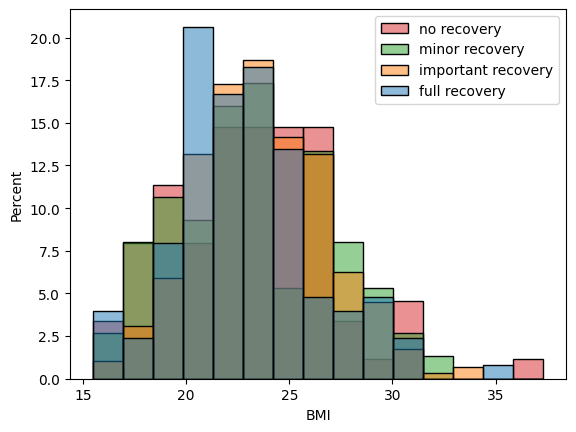

In [4]:
sns.histplot(raw_data, x='BMI', stat='percent', hue='prognostic', bins=15, common_norm=False)
plt.legend(['no recovery', 'minor recovery', 'important recovery', 'full recovery'])
plt.show()

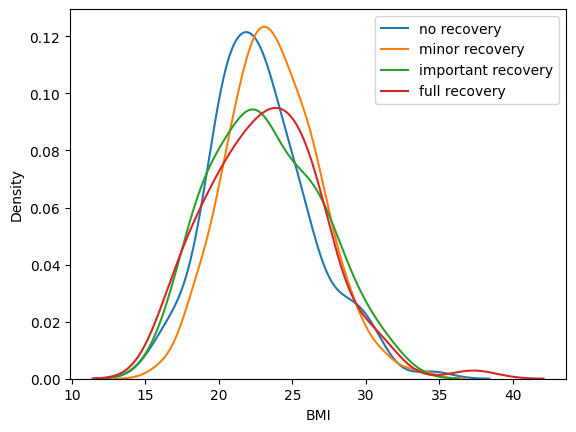

In [5]:
data = raw_data.copy()
data = data.fillna('-')
 
data = data[(data['prognostic'] != '-') & (data['BMI'] != '-')]
for effect in data["prognostic"].unique():
    sns.kdeplot(data[data["prognostic"] == effect]["BMI"], label=effect)
plt.legend(['no recovery', 'minor recovery', 'important recovery', 'full recovery'])
plt.savefig('../output/BMI_influence.pdf', bbox_inches="tight")
plt.show()

In [6]:
import pandas as pd

control_RF_feature_importance = pd.read_csv("../output/control/RF_feature_importance.csv", header=[0], index_col=0)
miNNseq_RF_feature_importance = pd.read_csv("../output/miNNseq/RF_feature_importance.csv", header=[0], index_col=0)

missing_distribution = pd.read_csv("../output/distribution/missing_distribution.csv", header=[0], index_col=0)

In [7]:
control_RF_feature_importance

,Gender,Age,Left ear/Right ear,Days from onset to treatment(absolute),days from onset to treatment (categorized),Vertigo,Ear blockage,Tinnitus,Hypertension,Diabetes,...,Mean hearing threshold (affected side),WHO classify (affected side),Curve type (affected side),Mean hearing threshold (contralateral),WHO classify (contralateral),Curve type (contralateral),loudness recruitment(affected side),ABR,DPOAE response,target
0,0.008413,0.085579,0.010427,0.094242,0.057852,0.009983,0.010194,0.006563,0.008080,0.004747,...,0.070521,0.017871,0.026871,0.058460,0.012189,0.010760,0.008562,0.005685,0.012231,minor
1,0.007877,0.083364,0.008300,0.094317,0.056878,0.013579,0.013328,0.008669,0.004724,0.005150,...,0.058448,0.015791,0.023191,0.061382,0.013775,0.009361,0.007191,0.005952,0.016375,minor
2,0.008300,0.073884,0.008837,0.102190,0.042402,0.006748,0.006888,0.006608,0.004690,0.006370,...,0.067968,0.020252,0.022134,0.059875,0.013515,0.007048,0.008331,0.007854,0.017332,minor
3,0.008153,0.071729,0.007522,0.100768,0.059022,0.006651,0.009649,0.009230,0.006006,0.006413,...,0.057502,0.016001,0.026168,0.057525,0.013444,0.008840,0.008402,0.005662,0.012652,minor
4,0.007647,0.074808,0.011070,0.095201,0.049514,0.009721,0.008565,0.007546,0.007637,0.008804,...,0.059136,0.016546,0.022188,0.058272,0.013847,0.010110,0.009856,0.006024,0.014987,minor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,0.012526,0.066679,0.010255,0.073842,0.032985,0.008697,0.010636,0.006261,0.007230,0.004396,...,0.106021,0.043581,0.022790,0.046479,0.009625,0.010716,0.009513,0.037445,0.049734,all
46,0.008783,0.059646,0.011612,0.068970,0.029753,0.008784,0.012953,0.003957,0.008091,0.005817,...,0.103582,0.044755,0.019776,0.051155,0.008682,0.008750,0.011084,0.033703,0.058546,all
47,0.008492,0.067807,0.008513,0.063063,0.022841,0.011421,0.013311,0.007191,0.006951,0.004427,...,0.101298,0.039128,0.030334,0.051021,0.011281,0.013736,0.006902,0.026467,0.074564,all
48,0.007806,0.070973,0.010818,0.075130,0.026986,0.009234,0.010212,0.006320,0.008308,0.004929,...,0.104286,0.046147,0.030678,0.045312,0.010063,0.009363,0.014253,0.029026,0.047569,all


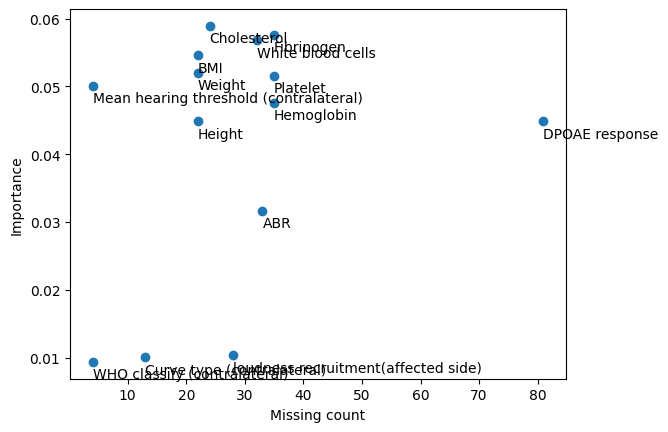

In [8]:
x = missing_distribution.sum(axis=1)
y = [
        control_RF_feature_importance[control_RF_feature_importance['target'] == 'all'][feature].mean()
        for feature in missing_distribution.index
    ]

plt.scatter(x, y)

for i, name in enumerate(missing_distribution.index):
    plt.annotate(name, (x[i], y[i]), textcoords="offset points", xytext=(0,-12))

plt.xlabel('Missing count')
plt.ylabel('Importance')

plt.savefig('../output/MissingCount_vs_FeatureImportance.pdf')
plt.show()